In [128]:
import scipy.io

In [129]:
import numpy as np

from scipy import stats
from matplotlib import pyplot as plt

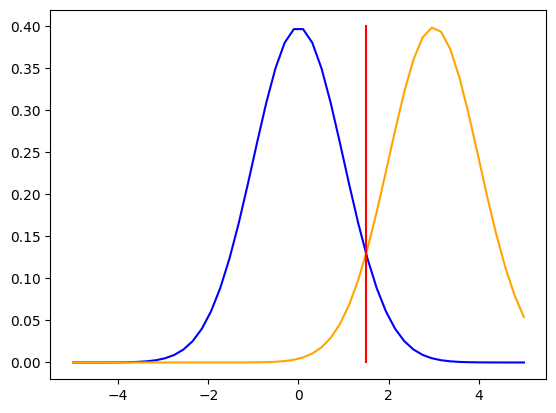

In [130]:
# 1

# V
x = np.linspace(-5, 5)
plt.plot(x, scipy.stats.norm().pdf(x), color="blue")
plt.plot(x, scipy.stats.norm(3, 1).pdf(x), color="orange")
plt.plot([1.5, 1.5], [0, 0.4], color="red")

plt.show()

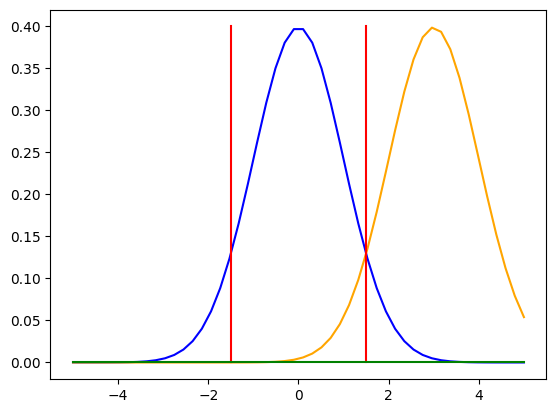

In [131]:
x = np.linspace(-5, 5)
plt.plot(x, scipy.stats.norm().pdf(x), color="blue")
plt.plot(x, scipy.stats.norm(3, 1).pdf(x), color="orange")
plt.plot([1.5, 1.5], [0, 0.4], color="red")
plt.plot([-1.5, -1.5], [0, 0.4], color="red")

plt.plot([-5, 5], [0, 0], color="green")
plt.show()

Problem 1.c

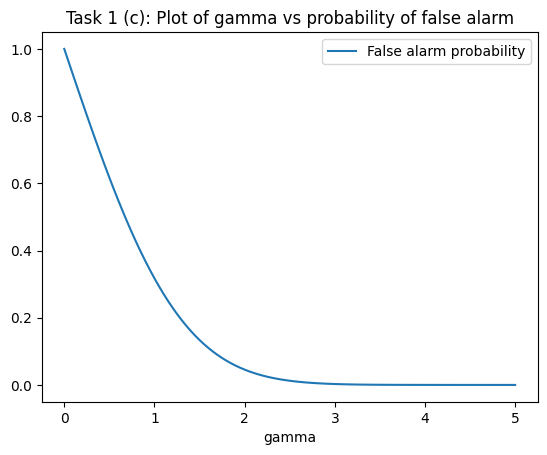

In [132]:
x1c = np.linspace(0, 5, 101)

plt.plot(
    x1c, (1.0 - scipy.stats.norm().cdf(x1c)) * 2.0, label="False alarm probability"
)

plt.legend()
plt.xlabel("gamma")
plt.title("Task 1 (c): Plot of gamma vs probability of false alarm")
plt.savefig("plt1c.png")

plt.show()

1.e

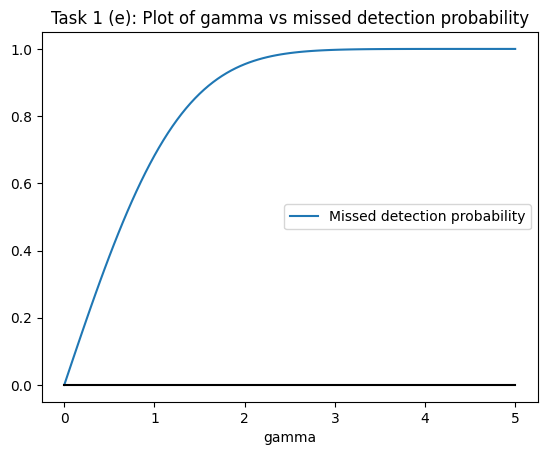

In [133]:
plt.plot(
    x1c,
    1 - 2 * (1 - 1 * scipy.stats.norm().cdf((x1c))),
    label="Missed detection probability",
)
plt.plot([0, 5], [0, 0], color="black")
plt.legend()
plt.title("Task 1 (e): Plot of gamma vs missed detection probability")
plt.xlabel("gamma")
plt.savefig("plt1e.png")
plt.show()

Problem 2

1.a - computing gamma

In [134]:
gamma_prob2 = 2 * scipy.stats.norm.ppf(0.9950)

In [135]:
print(gamma_prob2)

5.151658607097801


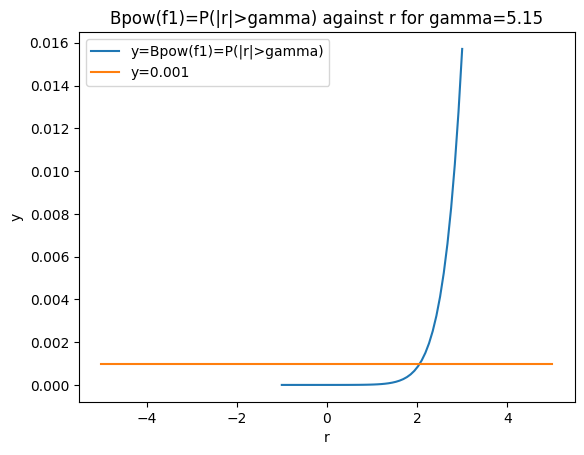

In [136]:
alpha_prob2 = 0.001
x2 = np.linspace(-1, 3)
plt.title(f"Bpow(f1)=P(|r|>gamma) against r for gamma={round(gamma_prob2,2)}")
plt.plot(x2, scipy.stats.norm(gamma_prob2).cdf(x2), label="y=Bpow(f1)=P(|r|>gamma)")
plt.ylabel("y")
plt.xlabel("r")
plt.plot([-5, 5], [alpha_prob2, alpha_prob2], label="y=0.001")
plt.legend()
# plt.plot( [alpha_prob2,alpha_prob2], [ 0 ,5 ] , label="0.001")
plt.savefig("plot2b.png")
plt.show()

problem 2.c - alpha and beta

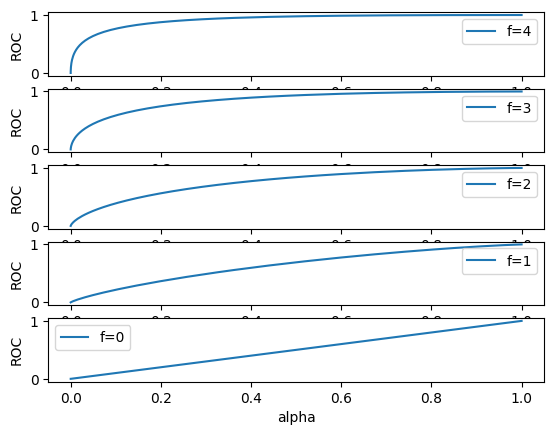

In [137]:
x2c = np.linspace(-100, 100, 1000)
# plt.title(f"ROC as a funciton of alpha")

for i, fi in enumerate([4, 3, 2, 1, 0]):

    plt.subplot(5, 1, i + 1)
    f1_2c = fi
    alpha_2c = 1.0 - scipy.stats.norm().cdf(x2c / 2)
    beta_2c = scipy.stats.norm().cdf((x2c - f1_2c) / 2)
    roc_2c = 1.0 - beta_2c
    plt.plot(alpha_2c, roc_2c, label=f"f={fi}")
    plt.ylabel("ROC")
    plt.xlabel("alpha")
    plt.legend()
plt.savefig("2b_f_var.png")
plt.show()

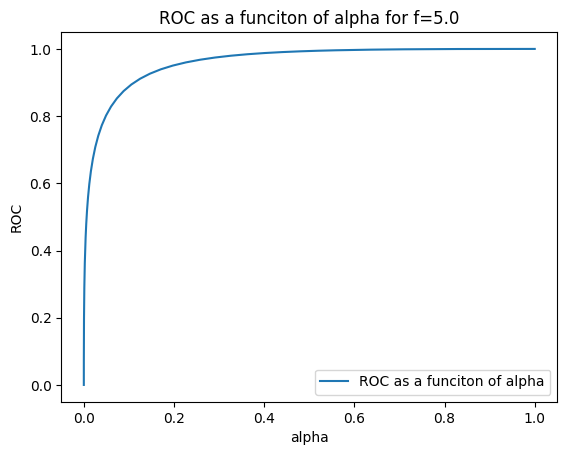

In [138]:
f1_2c_ii = 5.0
alpha_2c_ii = 1.0 - scipy.stats.norm().cdf(x2c / 2)
beta_2c_ii = scipy.stats.norm().cdf((x2c - f1_2c_ii) / 2)
roc_2c_ii = 1.0 - beta_2c_ii
plt.plot(alpha_2c_ii, roc_2c_ii, label="ROC as a funciton of alpha")
plt.ylabel("ROC")
plt.xlabel("alpha")
plt.legend()
plt.title(f"ROC as a funciton of alpha for f={f1_2c_ii}")
plt.savefig("2b_f5.png")
plt.show()

Problem 3

In [139]:
data = scipy.io.loadmat("residualdata.mat")

In [140]:
k = data["k"]
r = data["r"]
# print(f"k={k}\nr={r}")

In [141]:
# T: mean time to false alarm
# tau: mean delau for detection
f = np.mean(r)
f1 = f
sigma_r = np.sqrt(np.var(r))
us0 = -np.square(f1) / (2 * np.square(sigma_r))
us1 = np.square(f1) / (2 * np.square(sigma_r))
usf = (f1 / np.square(sigma_r)) * (f - f1 / 2)
sigma_2_sf = np.square(f1) / np.square(sigma_r)


def Lsigm(usf, sigma_sf, h):
    v1 = usf * h / np.square(sigma_sf) + 1.166 * usf / sigma_sf
    upper = np.exp(-2 * v1) - 1 + 2 * v1
    lower = 2 * np.square(usf) / np.square(sigma_sf)
    res = upper / lower
    return res


def compute_L(h):
    global usf, us0, us1, sigma_2_sf
    return Lsigm(us0, np.sqrt(sigma_2_sf), h)

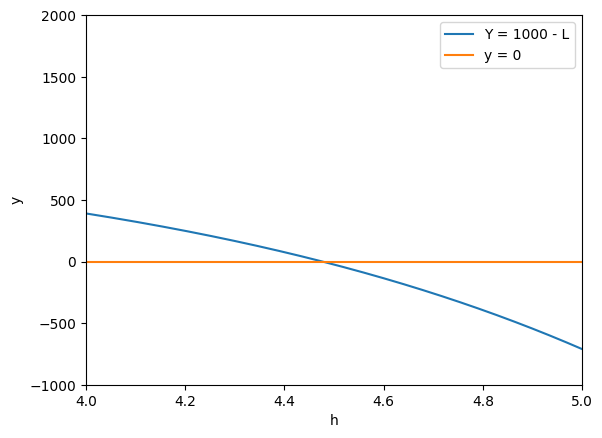

In [142]:
cands = np.linspace(1, 175, 100000)
cand_y = compute_L(cands)
plt.ylim(-1000, 2000)
# plt.ylim(-1, 1)
plt.xlim(4, 5)
# plt.xlim(1, 160)
plt.plot(cands, 1000 - cand_y, label="Y = 1000 - L")
plt.plot([1, 175], [0, 0], label="y = 0")
plt.ylabel("y")
plt.xlabel("h")
plt.legend()
plt.show()

In [143]:
r_arr = np.array(r[0])

In [144]:
h = 4.5
n = len(r_arr)
C = np.zeros(n)
for t in range(n):
    if t > 0:
        tmp = C[t - 1] + r_arr[t] - h
    else:
        tmp = r_arr[t] - h
    # it was 0 before (np.zeros), so it ends up being max(0,tmp)
    if tmp > 0:
        C_t = tmp
        C[t] = C_t

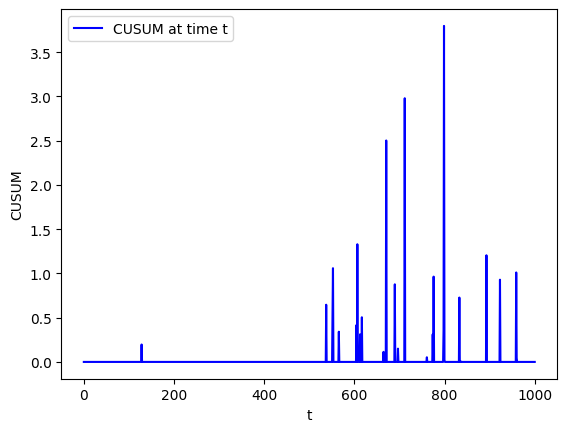

In [145]:
plt.plot(np.linspace(0, n, n), C, color="blue", label="CUSUM at time t")
# plt.plot(np.linspace(0, n, n), r, color="red", label="r")
plt.xlabel("t")
plt.ylabel("CUSUM")
plt.legend()
plt.savefig("cusum.png")
plt.show()